In [1]:
import pandas as pd
import numpy as np
import json
import sys, os, importlib


import iesta.loader
import iesta.processor as processor
import iesta.properties as prop


import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.reset_defaults()
sns.set(
    rc={"figure.figsize": (6, 4)},
    # style="white" # nicer layout
)

In [2]:
# load  automatically the flat debate votes with the effect
proc = processor.Process()

dismissed: 3262


In [4]:
debate_vote_df = proc.vote_w_effect_df

In [12]:
proc.loader.debates_df

,url,category,title,comments,votes,rounds,forfeit_label,forfeit_side,start_date,update_date,...,participant_1_link,participant_1_name,participant_1_points,participant_1_position,participant_1_status,participant_2_link,participant_2_name,participant_2_points,participant_2_position,participant_2_status
.-.-.-Ha-YOURE-GOING-DOWN-BEEM0R/1/,http://www.debate.org/debates/.-.-.-Ha-YOURE-G...,Miscellaneous,". . . Ha! YOU'RE GOING DOWN, BEEM0R!","[{'user_name': 'Ragaxus', 'time': '7 years ago...","[{'user_name': 'Cliff.Stamp', 'time': '7 years...","[[{'side': 'Pro', 'text': ' RESOLVED: It i...",False,None,2/2/2009,9 years ago,...,http://www.debate.org/Logical-Master/,Logical-Master,33,Pro,Winning,http://www.debate.org/beem0r/,beem0r,32,Con,Losing
.-Audis-are-junkers-except-to-rich-kids-with-limitless-assets-and-time-to-maintain-them./1/,http://www.debate.org/debates/.-Audis-are-junk...,Cars,". Audis are junkers, except to rich kids with ...","[{'user_name': 'Max.Wallace', 'time': '3 years...","[{'user_name': 'MasturDebatur', 'time': '4 yea...","[[{'side': 'Pro', 'text': ' When the Audi ...",False,None,9/4/2014,4 years ago,...,http://www.debate.org/Max.Wallace/,Max.Wallace,0,Pro,Losing,http://www.debate.org/TheCalmCanadian/,TheCalmCanadian,7,Con,Winning
....-Former-Secretary-of-State-Madeleine-Albright-will-stand-with-Muslims-Are-we-suprised/1/,http://www.debate.org/debates/....-Former-Secr...,Politics,"....""Former Secretary of State Madeleine Albri...","[{'user_name': 'DavidMancke', 'time': '1 year ...",[],"[[{'side': 'Pro', 'text': ' ...."" Clinton ...",True,Tide_Bleach,1/30/2017,1 year ago,...,http://www.debate.org/Lookingatissues/,Lookingatissues,not available,Pro,not available,http://www.debate.org/Tide_Bleach/,Tide_Bleach,not available,Con,not available
...Words-can-t-hurt-me-any./1/,http://www.debate.org/debates/...Words-can-t-h...,Society,...Words can't hurt me any.,"[{'user_name': 'wjmelements', 'time': '9 years...","[{'user_name': 'wjmelements', 'time': '9 years...","[[{'side': 'Pro', 'text': ' I'm sure every...",False,None,12/19/2007,10 years ago,...,http://www.debate.org/NonInDelicto/,NonInDelicto,16,Pro,Winning,http://www.debate.org/debaterjake/,debaterjake,3,Con,Losing
.9-repeated-is-equal-to-1./1/,http://www.debate.org/debates/.9-repeated-is-e...,Science,.9 repeated is equal to 1.,"[{'user_name': 'gizmo1650', 'time': '7 years a...","[{'user_name': 'iholland95', 'time': '5 years ...","[[{'side': 'Pro', 'text': ' First, I will ...",False,None,4/7/2011,7 years ago,...,http://www.debate.org/cowpie1998/,cowpie1998,5,Pro,Losing,http://www.debate.org/Extremely-Far-Right/,Extremely-Far-Right,42,Con,Winning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoos/6/,http://www.debate.org/debates/Zoos/6/,Philosophy,Zoos,[],"[{'user_name': 'Ragnar', 'time': '3 years ago'...","[[{'side': 'Con', 'text': ' Zoos are not l...",False,None,4/13/2015,3 years ago,...,http://www.debate.org/AlwaysRight12345/,AlwaysRight12345,8,Pro,Winning,http://www.debate.org/InquiringMind/,InquiringMind,0,Con,Losing
Zoos/7/,http://www.debate.org/debates/Zoos/7/,Society,Zoo's,[],[],"[[{'side': 'Con', 'text': ' I believe that...",False,None,4/20/2015,3 years ago,...,http://www.debate.org/HaileyL/,HaileyL,0,Pro,Tied,http://www.debate.org/ToniMC23/,ToniMC23,0,Con,Tied
ZP-Theart-is-a-great-singer...-perhaps-one-of-the-greatest/1/,http://www.debate.org/debates/ZP-Theart-is-a-g...,People,ZP Theart is a great singer... perhaps one of ...,[],[],"[[{'side': 'Pro', 'text': ' In this debate...",False,None,5/5/2014,4 years ago,...,http://www.debate.org/perplexingstories/,perplexingstories,0,Pro,Tied,http://www.debate.org/gangsta_krushnov/,gangsta_krushnov,0,Con,Tied
Zucas-Should-be-Banned/1/,http://www.debate.org/debates/Zucas-Should-be-...,Fashion,Zucas Should be Banned,[],[],"[[{'side': 'Con', 'text': ' Zucas are soo ...",False,None,10/30/2013,4 years ago,...,http://www.debate.org/jakedugi/,jakedugi,0,Pro,Tied,http://www.debate.org/

In [23]:
IDEOLOGIES = [prop.LIBERAL_IDEOLOGY, prop.CONSERVATIVE_IDEOLOGY]

print("unique debates", len(debate_vote_df["debate_id"].unique()))


print(
    "debates where at least p1 or p2 is conservative or liberal",
    len(
        debate_vote_df[
            (debate_vote_df["p1_ideology"].isin(IDEOLOGIES))
            | (debate_vote_df["p2_ideology"].isin(IDEOLOGIES))
        ]
    ),
)

print(
    "debates where at  p1-p2 are a conservative- liberal pair",
    len(
        debate_vote_df[
            (debate_vote_df["p1_ideology"].isin(IDEOLOGIES))
            & (debate_vote_df["p2_ideology"].isin(IDEOLOGIES))
            & (debate_vote_df["p1_ideology"] != debate_vote_df["p2_ideology"])
        ]["debate_id"].unique()
    ),
)


print(
    "debates where p1 ideology is diff than p2:",
    len(
        debate_vote_df[
            debate_vote_df["p1_ideology"] != debate_vote_df["p2_ideology"]
        ]["debate_id"].unique()
    ),
)


# debates where at least p1 or p2 is conservative or liberal 46018
# debates where at  p1-p2 are a conservative- liberal pair 983
# debates where p1 ideology is diff than p2: 36184

unique debates 46018
debates where at least p1 or p2 is conservative or liberal 65047
debates where at  p1-p2 are a conservative- liberal pair 983
debates where p1 ideology is diff than p2: 36184


In [24]:
print(
    "Liberal/Cons ideologies who changed their votes for opposite participants:"
)
before_after_change_df = debate_vote_df[
    (debate_vote_df["voter_ideology"].isin(IDEOLOGIES))
    & (
        (
            (debate_vote_df["p1_ideology"] != debate_vote_df["voter_ideology"])
            & (
                debate_vote_df["p1_agree_before"]
                != debate_vote_df["p1_agree_after"]
            )
        )
        | (
            (debate_vote_df["p2_ideology"] != debate_vote_df["voter_ideology"])
            & (
                debate_vote_df["p2_agree_before"]
                != debate_vote_df["p2_agree_after"]
            )
        )
    )
]


print("      total votes changed: ", len(before_after_change_df))
print(
    "      unique debates:", len(before_after_change_df["debate_id"].unique())
)

Liberal/Cons ideologies who changed their votes for opposite participants:
      total votes changed:  2262
      unique debates: 2086


<AxesSubplot:>

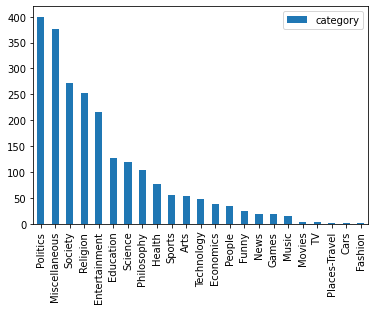

In [25]:
before_after_change_df["category"].value_counts().to_frame().plot(kind="bar")

## Setting Main_ voters: Lib or cons - participant different than voter

In [13]:
(
    liberal_dataset,
    liberal_not_found,
) = proc.get_ideology_based_voter_participant_df(prop.LIBERAL_IDEOLOGY)
(
    liberal_arguments_df,
    liberal_not_found,
) = proc.get_ideology_based_voter_participant_df(prop.LIBERAL_IDEOLOGY)

In [14]:
(
    conservative_dataset,
    conservative_not_found,
) = proc.get_ideology_based_voter_participant_df(prop.CONSERVATIVE_IDEOLOGY)
(
    conservative_arguments_df,
    conservative_not_found,
) = proc.get_ideology_based_voter_participant_df(prop.CONSERVATIVE_IDEOLOGY)

In [16]:
conservative_arguments_df["category"].value_counts().to_frame().plot(
    kind="bar"
)
liberal_arguments_df["category"].value_counts().to_frame().plot(kind="bar")

<AxesSubplot:>

In [18]:
conservative_arguments_df[
    "effect"
].value_counts().to_frame()  # .plot(kind="bar")
liberal_arguments_df["effect"].value_counts().to_frame()  # .plot(kind="bar")

,effect
ineffective,53811
okay,9632
effective,2583
provocative,818
